In [2]:
import numpy as np
import pickle

signalAllSubj = []
count = 0
subjNum2IdxMap = {}
subjIdx2NumMap = {}

for i in range(2,78):
    num = f'00{i}' if i < 10 else f'0{i}'
    try:
        infile = f'/home/anton/Documents/Tulane/Hackathon/ImageNomeR/data/fmri-ts-epr/sub-{num}.pkl'
        with open(infile, 'rb') as f:
            signal = pickle.load(f)
            signalAllSubj.append(signal)
            subjNum2IdxMap[num] = count
            subjIdx2NumMap[count] = num
            count += 1
    except:
        print(f'No subject {i}')
        
print(len(signalAllSubj))
print([signal.shape for signal in signalAllSubj])

No subject 5
No subject 27
No subject 35
No subject 41
No subject 51
No subject 57
No subject 65
No subject 67
No subject 71
67
[(264, 775), (264, 1090), (264, 775), (264, 775), (264, 775), (264, 775), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834), (264, 834)]


In [16]:
print(subjIdx2NumMap['077'])

66


In [3]:
from scipy import signal

def butter_bandpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='band', analog=False)
    return b, a

def butter_bandpass_filter(data, cutoff, fs, order=5):
    b, a = butter_bandpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

filtSignal = [butter_bandpass_filter(signal, 
                                    np.array([10,3/4*signal.shape[-1]]), 
                                    signal.shape[-1]*(2.1)) for signal in signalAllSubj]
print(len(filtSignal))

67


In [4]:
pSubj = [np.corrcoef(sig) for sig in filtSignal]
pSubj = np.stack(pSubj)

print(pSubj.shape)

(67, 264, 264)


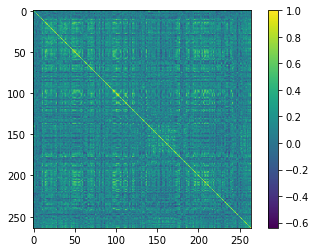

In [11]:
import matplotlib.pyplot as plt

plt.imshow(pSubj[0])
plt.colorbar()
plt.show()

In [12]:
a,b = np.triu_indices(264,1)
idcs = np.arange(34716)

pSubjSlim = [pSubj[n,a[idcs],b[idcs]] for n in range(pSubj.shape[0])]
pSubjSlim = np.stack(pSubjSlim)

print(pSubjSlim.shape)

(67, 34716)


In [13]:
groupsFname = '/home/anton/Documents/Tulane/Hackathon/ImageNomeR/data/fmri-groups.txt'
groupsNormalDiagMap = {}

with open(groupsFname, 'r') as f:
    for line in f.readlines():
        parts = line.split('\t')
        numInt = int(parts[0])
        normalDiag = int(parts[1])
        for num in subjNum2IdxMap:
            if int(num) == numInt:
                groupsNormalDiagMap[num] = normalDiag
                
print(groupsNormalDiagMap)

{'002': 0, '004': 0, '006': 0, '007': 1, '008': 0, '009': 0, '010': 0, '011': 0, '012': 1, '013': 0, '014': 1, '015': 0, '016': 1, '017': 0, '018': 1, '019': 0, '020': 0, '021': 1, '022': 1, '023': 0, '024': 0, '025': 0, '026': 1, '028': 0, '029': 0, '030': 1, '031': 1, '032': 1, '033': 1, '034': 1, '036': 1, '037': 0, '038': 0, '039': 0, '040': 0, '042': 1, '043': 0, '044': 0, '045': 1, '046': 0, '047': 1, '049': 0, '050': 0, '052': 0, '053': 0, '054': 0, '055': 0, '056': 1, '058': 1, '059': 1, '060': 1, '061': 1, '062': 0, '063': 0, '064': 1, '066': 1, '068': 1, '069': 1, '070': 1, '072': 1, '073': 1, '074': 1, '075': 1, '076': 1, '077': 1}


In [14]:
import pickle

fcFile = '/home/anton/Documents/Tulane/Hackathon/ImageNomeR/data/fmri-FC-epr-slim.pkl'
fmriDataDict = {
    'FC-slim': pSubjSlim,
    'subjNum2IdxMap': subjNum2IdxMap,
    'subjIdx2NumMap': subjIdx2NumMap,
    'groupsNormalDiagMap': groupsNormalDiagMap
}

with open(fcFile, 'wb') as f:
    pickle.dump(fmriDataDict, f)
    
print('Complete')

Complete
